In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
import itertools
import warnings
import scipy.stats as stats
import seaborn as sns
import pandas_profiling 


from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
plt.style.use('bmh')

In [2]:
df_train = pd.read_csv(r'C:\Users\Logic_Master\Downloads\6. WALMART STORE PREDICTION - FORECASTING\data\train.csv')

In [3]:
df_features = pd.read_csv(r'C:\Users\Logic_Master\Downloads\6. WALMART STORE PREDICTION - FORECASTING\data\features.csv')


In [4]:
df_test = pd.read_csv(r'C:\Users\Logic_Master\Downloads\6. WALMART STORE PREDICTION - FORECASTING\data\test.csv')

In [5]:
df_stores = pd.read_csv(r'C:\Users\Logic_Master\Downloads\6. WALMART STORE PREDICTION - FORECASTING\data\stores.csv')

In [6]:
df_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [7]:
df_test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [8]:
len(df_train)

421570

In [9]:
len(df_test)

115064

In [10]:
frames = [df_train,df_test]

In [11]:
main = pd.concat(frames)

C:\Users\Logic_Master\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [12]:
main.head()

,Date,Dept,IsHoliday,Store,Weekly_Sales
0,2010-02-05,1,False,1,24924.50
1,2010-02-12,1,True,1,46039.49
2,2010-02-19,1,False,1,41595.55
3,2010-02-26,1,False,1,19403.54
4,2010-03-05,1,False,1,21827.90


In [13]:
df_stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [14]:
main2=pd.merge(df_stores,main,on='Store')

In [15]:
main2.head()

,Store,Type,Size,Date,Dept,IsHoliday,Weekly_Sales
0,1,A,151315,2010-02-05,1,False,24924.50
1,1,A,151315,2010-02-12,1,True,46039.49
2,1,A,151315,2010-02-19,1,False,41595.55
3,1,A,151315,2010-02-26,1,False,19403.54
4,1,A,151315,2010-03-05,1,False,21827.90


In [16]:
df_features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [17]:
main2.head()

,Store,Type,Size,Date,Dept,IsHoliday,Weekly_Sales
0,1,A,151315,2010-02-05,1,False,24924.50
1,1,A,151315,2010-02-12,1,True,46039.49
2,1,A,151315,2010-02-19,1,False,41595.55
3,1,A,151315,2010-02-26,1,False,19403.54
4,1,A,151315,2010-03-05,1,False,21827.90


In [18]:
main3 = pd.merge(main2,df_features,on=['Date','Store','IsHoliday'])

In [19]:
main3.head()

,Store,Type,Size,Date,Dept,IsHoliday,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,A,151315,2010-02-05,1,False,24924.50,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,A,151315,2010-02-05,2,False,50605.27,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
2,1,A,151315,2010-02-05,3,False,13740.12,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
3,1,A,151315,2010-02-05,4,False,39954.04,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
4,1,A,151315,2010-02-05,5,False,32229.38,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106


In [246]:
main3.corr()

,Size,IsHoliday,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
Size,1.000000,0.000345,0.243828,-0.058202,0.009058,0.325043,0.128038,0.049204,0.161441,0.140382,-0.003341,-0.057509
IsHoliday,0.000345,1.000000,0.012774,-0.163056,-0.077976,0.155907,0.306810,0.455563,0.137478,-0.025361,0.001410,-0.002996
Weekly_Sales,0.243828,0.012774,1.000000,-0.002312,-0.000120,0.085251,0.024130,0.060385,0.045414,0.090362,-0.020921,-0.025864
Temperature,-0.058202,-0.163056,-0.002312,1.000000,0.099235,-0.107973,-0.323246,-0.076256,-0.060487,0.002354,0.169070,0.145725
Fuel_Price,0.009058,-0.077976,-0.000120,0.099235,1.000000,0.065501,-0.200338,-0.059407,-0.010329,-0.023529,-0.180445,-0.030976
MarkDown1,0.325043,0.155907,0.085251,-0.107973,0.065501,1.000000,0.014288,-0.096141,0.810074,0.078151,-0.041049,0.025099
MarkDown2,0.128038,0.306810,0.024130,-0.323246,-0.200338,0.014288,1.000000,-0.055310,-0.048790,-0.010670,-0.043525,-0.002587
MarkDown3,0.049204,0.455563,0.060385,-0.076256,-0.059407,-0.096141,-0.055310,1.000000,-0.064432,-0.017531,-0.020147,-0.002328
MarkDown4,0.161441,0.137478,0.045414,-0.060487,-0.010329,0.810074,-0.048790,-0.064432,1.000000,0.040804,-0.051643,0.021755
MarkDown5,0.140382,-0.025361,0.090362,0.002354,-0.023529,0.078151,-0.010670,-0.017531,0.040804,1.000000,0.002009,0.034047


In [20]:
#Converting Date to week
#Converting the dates into dateime format
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
main3['Dates'] = main3['Date'].apply(dateparse)
main3['Week'] = main3['Dates'].dt.week

In [21]:
main3.head()

,Store,Type,Size,Date,Dept,IsHoliday,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Dates,Week
0,1,A,151315,2010-02-05,1,False,24924.50,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,2010-02-05,5
1,1,A,151315,2010-02-05,2,False,50605.27,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,2010-02-05,5
2,1,A,151315,2010-02-05,3,False,13740.12,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,2010-02-05,5
3,1,A,151315,2010-02-05,4,False,39954.04,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,2010-02-05,5
4,1,A,151315,2010-02-05,5,False,32229.38,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,2010-02-05,5


In [22]:
main3.drop(['Dates'],axis=1,inplace=True)

In [23]:
main3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536634 entries, 0 to 536633
Data columns (total 17 columns):
Store           536634 non-null int64
Type            536634 non-null object
Size            536634 non-null int64
Date            536634 non-null object
Dept            536634 non-null int64
IsHoliday       536634 non-null bool
Weekly_Sales    421570 non-null float64
Temperature     536634 non-null float64
Fuel_Price      536634 non-null float64
MarkDown1       265596 non-null float64
MarkDown2       197685 non-null float64
MarkDown3       242326 non-null float64
MarkDown4       237143 non-null float64
MarkDown5       266496 non-null float64
CPI             498472 non-null float64
Unemployment    498472 non-null float64
Week            536634 non-null int64
dtypes: bool(1), float64(10), int64(4), object(2)
memory usage: 70.1+ MB


In [24]:
main3.describe()

,Store,Size,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Week
count,536634.000000,536634.000000,536634.000000,421570.000000,536634.000000,536634.000000,265596.000000,197685.000000,242326.000000,237143.000000,266496.000000,498472.000000,498472.000000,536634.000000
mean,22.208621,136678.550960,44.277301,15981.258123,58.771762,3.408310,7438.004144,3509.274827,1857.913525,3371.556866,4324.021158,172.090481,7.791888,25.231581
std,12.790580,61007.711799,30.527358,22711.183519,18.678716,0.430861,9411.341379,8992.047197,11616.143274,6872.281734,13549.262124,39.542149,1.865076,14.554119
min,1.000000,34875.000000,1.000000,-4988.940000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000,1.000000
25%,11.000000,93638.000000,18.000000,2079.650000,45.250000,3.041000,2114.640000,72.500000,7.220000,336.240000,1570.112500,132.521867,6.623000,13.000000
50%,22.000000,140167.000000,37.000000,7612.030000,60.060000,3.523000,5126.540000,385.310000,40.760000,1239.040000,2870.910000,182.442420,7.795000,24.000000
75%,33.000000,202505.000000,74.000000,20205.852500,73.230000,3.744000,9303.850000,2392.390000,174.260000,3397.080000,5012.220000,213.748126,8.549000,37.000000
max,45.000000,219622.000000,99.000000,693099.360000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000,52.000000


In [25]:
main3.head()

,Store,Type,Size,Date,Dept,IsHoliday,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Week
0,1,A,151315,2010-02-05,1,False,24924.50,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,5
1,1,A,151315,2010-02-05,2,False,50605.27,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,5
2,1,A,151315,2010-02-05,3,False,13740.12,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,5
3,1,A,151315,2010-02-05,4,False,39954.04,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,5
4,1,A,151315,2010-02-05,5,False,32229.38,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,5


In [26]:
exploratory_report = pandas_profiling.ProfileReport(main3)

In [27]:
exploratory_report

Number of variables,17
Number of observations,536634
Total Missing (%),18.3%
Total size in memory,70.1 MiB
Average record size in memory,137.0 B
Numeric,14
Categorical,2
Boolean,1
Date,0
Text (Unique),0
Rejected,0


In [28]:
exploratory_report.to_file('D:\Walmart\exploratory_report.html')

In [29]:
main3.dtypes

Store             int64
Type             object
Size              int64
Date             object
Dept              int64
IsHoliday          bool
Weekly_Sales    float64
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
Week              int64
dtype: object

In [30]:
main3.drop(['Date'],axis=1,inplace=True)

In [31]:
main3['Store'] = main3['Store'].astype(int).astype(object)

In [32]:
main3['Week'] = main3['Week'].astype(int).astype(object)

In [33]:
main3['Dept'] = main3['Dept'].astype(int).astype(object)

In [34]:
main3.dtypes

Store            object
Type             object
Size              int64
Dept             object
IsHoliday          bool
Weekly_Sales    float64
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
Week             object
dtype: object

In [35]:
numeric = ['float64','int64']

In [36]:
cat = ['object','bool']

In [37]:
main_cat = main3.select_dtypes(cat)

In [38]:
main_num= main3.select_dtypes(numeric)

In [39]:
main_cat.head()

,Store,Type,Dept,IsHoliday,Week
0,1,A,1,False,5
1,1,A,2,False,5
2,1,A,3,False,5
3,1,A,4,False,5
4,1,A,5,False,5


In [40]:
main_cat.head()

,Store,Type,Dept,IsHoliday,Week
0,1,A,1,False,5
1,1,A,2,False,5
2,1,A,3,False,5
3,1,A,4,False,5
4,1,A,5,False,5


In [41]:
main_num.head()

,Size,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,151315,24924.50,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,151315,50605.27,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
2,151315,13740.12,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
3,151315,39954.04,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
4,151315,32229.38,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106


In [42]:
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.std()/x.mean(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'CV','MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])


In [43]:
audit_report = main_num.apply(var_summary)

In [44]:
audit_report

,Size,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
N,5.366340e+05,4.215700e+05,5.366340e+05,5.366340e+05,2.655960e+05,1.976850e+05,2.423260e+05,2.371430e+05,2.664960e+05,4.984720e+05,4.984720e+05
NMISS,0.000000e+00,1.150640e+05,0.000000e+00,0.000000e+00,2.710380e+05,3.389490e+05,2.943080e+05,2.994910e+05,2.701380e+05,3.816200e+04,3.816200e+04
SUM,7.334636e+10,6.737219e+09,3.153893e+07,1.829015e+06,1.975504e+09,6.937310e+08,4.502208e+08,7.995411e+08,1.152334e+09,8.578229e+07,3.884038e+06
MEAN,1.366786e+05,1.598126e+04,5.877176e+01,3.408310e+00,7.438004e+03,3.509275e+03,1.857914e+03,3.371557e+03,4.324021e+03,1.720905e+02,7.791888e+00
MEDIAN,1.401670e+05,7.612030e+03,6.006000e+01,3.523000e+00,5.126540e+03,3.853100e+02,4.076000e+01,1.239040e+03,2.870910e+03,1.824424e+02,7.795000e+00
STD,6.100771e+04,2.271118e+04,1.867872e+01,4.308613e-01,9.411341e+03,8.992047e+03,1.161614e+04,6.872282e+03,1.354926e+04,3.954215e+01,1.865076e+00
VAR,3.721941e+09,5.157979e+08,3.488944e+02,1.856414e-01,8.857335e+07,8.085691e+07,1.349348e+08,4.722826e+07,1.835825e+08,1.563582e+03,3.478508e+00
CV,4.463591e-01,1.421114e+00,3.178179e-01,1.264149e-01,1.265305e+00,2.562366e+00,6.252252e+00,2.038311e+00,3.133487e+00,2.297753e-01,2.393612e-01
MIN,3.487500e+04,-4.988940e+03,-7.290000e+00,2.472000e+00,-2.781450e+03,-2.657600e+02,-1.792600e+02,2.200000e-01,-1.851700e+02,1.260640e+02,3.684000e+00
P1,3.487500e+04,5.000000e+00,1.687000e+01,2.572000e+00,1.820000e+01,1.000000e-02,1.000000e-01,3.000000e+00,3.171900e+02,1.261140e+02,4.077000e+00


In [45]:
audit_report.to_csv('D:\Walmart\Audit_report.csv')

In [46]:
#Outlier capping
def outlier_capping(x):
    x = x.clip_upper(x.quantile(0.99))
    x = x.clip_lower(x.quantile(0.01))
    return x

main_num=main_num.apply(outlier_capping)

In [47]:
Y = main_num['Weekly_Sales']

In [48]:
Y = pd.DataFrame(Y)

In [49]:
Y.columns = ['Weekly_Sales']

In [50]:
main_num.drop(['Weekly_Sales'],axis=1,inplace=True)

In [51]:
#missing value treatment
main_num = main_num.fillna(main_num.median())

In [52]:
main_num.isnull().any()

Size            False
Temperature     False
Fuel_Price      False
MarkDown1       False
MarkDown2       False
MarkDown3       False
MarkDown4       False
MarkDown5       False
CPI             False
Unemployment    False
dtype: bool

In [53]:
main_cat = main_cat.fillna(main_cat.mode())

In [54]:
dummy = pd.get_dummies(main_cat)

In [55]:
dummy['IsHoliday'] = dummy['IsHoliday'].astype(int)

In [56]:
dummy.head()

,IsHoliday,Store_1,Store_2,Store_3,Store_4,Store_5,Store_6,Store_7,Store_8,Store_9,...,Week_43,Week_44,Week_45,Week_46,Week_47,Week_48,Week_49,Week_50,Week_51,Week_52
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
df = pd.concat([dummy,main_num],axis=1)

In [58]:
df.head()

,IsHoliday,Store_1,Store_2,Store_3,Store_4,Store_5,Store_6,Store_7,Store_8,Store_9,...,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,0,1,0,0,0,0,0,0,0,0,...,151315.0,42.31,2.572,5126.54,385.31,40.76,1239.04,2870.91,211.096358,8.106
1,0,1,0,0,0,0,0,0,0,0,...,151315.0,42.31,2.572,5126.54,385.31,40.76,1239.04,2870.91,211.096358,8.106
2,0,1,0,0,0,0,0,0,0,0,...,151315.0,42.31,2.572,5126.54,385.31,40.76,1239.04,2870.91,211.096358,8.106
3,0,1,0,0,0,0,0,0,0,0,...,151315.0,42.31,2.572,5126.54,385.31,40.76,1239.04,2870.91,211.096358,8.106
4,0,1,0,0,0,0,0,0,0,0,...,151315.0,42.31,2.572,5126.54,385.31,40.76,1239.04,2870.91,211.096358,8.106


In [59]:
Y.head()

,Weekly_Sales
0,24924.50
1,50605.27
2,13740.12
3,39954.04
4,32229.38


In [60]:
df=pd.concat([Y,df],axis=1)

In [61]:
df.head()

,Weekly_Sales,IsHoliday,Store_1,Store_2,Store_3,Store_4,Store_5,Store_6,Store_7,Store_8,...,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,24924.50,0,1,0,0,0,0,0,0,0,...,151315.0,42.31,2.572,5126.54,385.31,40.76,1239.04,2870.91,211.096358,8.106
1,50605.27,0,1,0,0,0,0,0,0,0,...,151315.0,42.31,2.572,5126.54,385.31,40.76,1239.04,2870.91,211.096358,8.106
2,13740.12,0,1,0,0,0,0,0,0,0,...,151315.0,42.31,2.572,5126.54,385.31,40.76,1239.04,2870.91,211.096358,8.106
3,39954.04,0,1,0,0,0,0,0,0,0,...,151315.0,42.31,2.572,5126.54,385.31,40.76,1239.04,2870.91,211.096358,8.106
4,32229.38,0,1,0,0,0,0,0,0,0,...,151315.0,42.31,2.572,5126.54,385.31,40.76,1239.04,2870.91,211.096358,8.106


In [62]:
df_past = df[df['Weekly_Sales'].notnull()]

In [63]:
df_future = df[df['Weekly_Sales'].isnull()]

C:\Users\Logic_Master\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


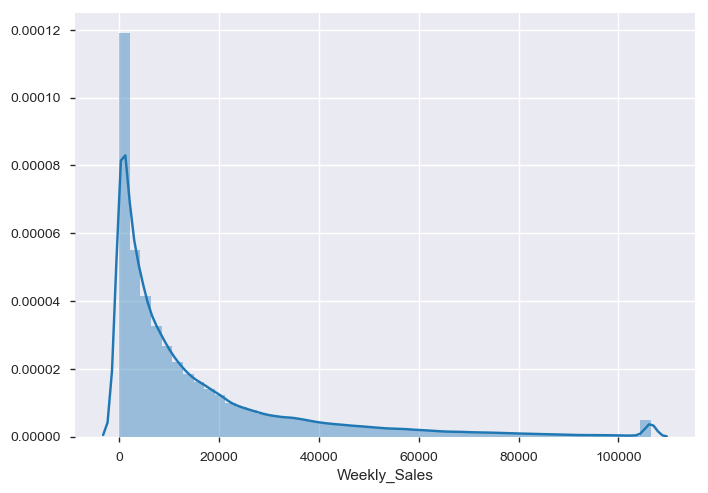

In [64]:
import seaborn as sns
sns.distplot(df_past['Weekly_Sales'])

In [65]:
df_past['ln_Weekly_Sales'] = np.log(df_past['Weekly_Sales']+1)

C:\Users\Logic_Master\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [66]:
df_past['ln_Weekly_Sales'].isnull().sum()

0

In [67]:
df_past = df_past.dropna()

In [68]:
df_past.replace([np.inf, -np.inf], np.nan)

,Weekly_Sales,IsHoliday,Store_1,Store_2,Store_3,Store_4,Store_5,Store_6,Store_7,Store_8,...,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,ln_Weekly_Sales
0,24924.50,0,1,0,0,0,0,0,0,0,...,42.31,2.572,5126.54,385.31,40.76,1239.04,2870.91,211.096358,8.106,10.123647
1,50605.27,0,1,0,0,0,0,0,0,0,...,42.31,2.572,5126.54,385.31,40.76,1239.04,2870.91,211.096358,8.106,10.831831
2,13740.12,0,1,0,0,0,0,0,0,0,...,42.31,2.572,5126.54,385.31,40.76,1239.04,2870.91,211.096358,8.106,9.528148
3,39954.04,0,1,0,0,0,0,0,0,0,...,42.31,2.572,5126.54,385.31,40.76,1239.04,2870.91,211.096358,8.106,10.595510
4,32229.38,0,1,0,0,0,0,0,0,0,...,42.31,2.572,5126.54,385.31,40.76,1239.04,2870.91,211.096358,8.106,10.380665
5,5749.03,0,1,0,0,0,0,0,0,0,...,42.31,2.572,5126.54,385.31,40.76,1239.04,2870.91,211.096358,8.106,8.656960
6,21084.08,0,1,0,0,0,0,0,0,0,...,42.31,2.572,5126.54,385.31,40.76,1239.04,2870.91,211.096358,8.106,9.956321
7,40129.01,0,1,0,0,0,0,0,0,0,...,42.31,2.572,5126.54,385.31,40.76,1239.04,2870.91,211.096358,8.106,10.599880
8,16930.99,0,1,0,0,0,0,0,0,0,...,42.31,2.572,5126.54,385.31,40.76,1239.04,2870.91,211.096358,8.106,9.736960
9,30721.50,0,1,0,0,0,0,0,0,0,...,42.31,2.572,5126.54,385.31,40.76,1239.04,2870.91,211.096358,8.106,10.332751


In [69]:
df_past = df_past.dropna()

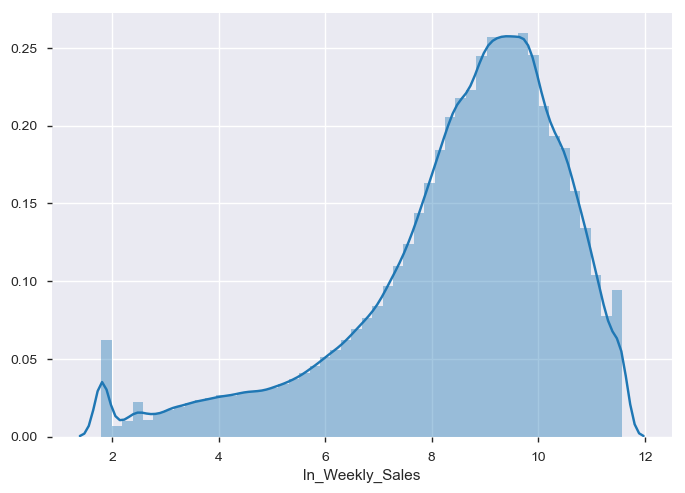

In [70]:
sns.distplot(df_past.ln_Weekly_Sales)


In [71]:
df_past.corr()

,Weekly_Sales,IsHoliday,Store_1,Store_2,Store_3,Store_4,Store_5,Store_6,Store_7,Store_8,...,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,ln_Weekly_Sales
Weekly_Sales,1.000000,0.007922,0.041116,0.074217,-0.067086,0.090844,-0.075338,0.046506,-0.054211,-0.018888,...,0.000878,0.001391,0.057915,0.019705,0.028225,0.037403,0.076408,-0.022725,-0.025430,0.678434
IsHoliday,0.007922,1.000000,0.000135,0.000101,-0.000177,0.000257,0.000439,0.000155,0.000257,-0.000012,...,-0.156545,-0.077609,-0.016434,0.196925,0.274511,0.009785,-0.030564,-0.001945,0.010328,0.004720
Store_1,0.041116,0.000135,1.000000,-0.024897,-0.023356,-0.024940,-0.023307,-0.024864,-0.024298,-0.024467,...,0.070058,-0.048711,0.010585,0.001535,0.000010,0.010650,0.014032,0.180520,-0.029580,0.040460
Store_2,0.074217,0.000101,-0.024897,1.000000,-0.023349,-0.024932,-0.023300,-0.024856,-0.024290,-0.024459,...,0.068959,-0.048320,0.035860,0.015627,0.005355,0.025144,0.040799,0.179081,-0.028523,0.062782
Store_3,-0.067086,-0.000177,-0.023356,-0.023349,1.000000,-0.023389,-0.021858,-0.023317,-0.022787,-0.022945,...,0.090536,-0.045583,-0.045410,-0.018648,-0.004377,-0.033422,-0.066513,0.182171,-0.062375,-0.060189
Store_4,0.090844,0.000257,-0.024940,-0.024932,-0.023389,1.000000,-0.023340,-0.024898,-0.024332,-0.024501,...,0.017987,-0.049838,0.025808,0.013905,0.006534,0.031964,0.052318,-0.171602,-0.168909,0.068344
Store_5,-0.075338,0.000439,-0.023307,-0.023300,-0.021858,-0.023340,1.000000,-0.023269,-0.022739,-0.022897,...,0.073458,-0.044902,-0.045954,-0.018201,-0.005961,-0.029976,-0.039647,0.171130,-0.132036,-0.066498
Store_6,0.046506,0.000155,-0.024864,-0.024856,-0.023317,-0.024898,-0.023269,1.000000,-0.024257,-0.024426,...,0.082116,-0.047882,0.014650,0.006126,0.005911,0.010189,0.026035,0.186536,-0.114626,0.055583
Store_7,-0.054211,0.000257,-0.024298,-0.024290,-0.022787,-0.024332,-0.022739,-0.024257,1.000000,-0.023870,...,-0.167630,-0.040558,-0.009463,-0.013542,-0.003874,-0.022088,-0.033115,0.088346,0.051778,-0.036974
Store_8,-0.018888,-0.000012,-0.024467,-0.024459,-0.022945,-0.024501,-0.022897,-0.024426,-0.023870,1.000000,...,0.019936,-0.047704,-0.001435,-0.000979,-0.002043,-0.022311,0.014474,0.190974,-0.155657,0.011763


In [72]:

df_past.drop(['Weekly_Sales'],axis=1,inplace=True)

In [73]:
Drivers = pd.DataFrame(df_past[df_past.columns].corr()['ln_Weekly_Sales'])

In [74]:
Drivers[Drivers['ln_Weekly_Sales']>0.05]

,ln_Weekly_Sales
Store_2,0.062782
Store_4,0.068344
Store_6,0.055583
Store_10,0.053324
Store_13,0.063579
Store_14,0.061600
Store_20,0.067854
Store_27,0.056126
Type_A,0.191868
Dept_1,0.068361


In [75]:
feature_columns_past = df_past.columns.difference(['ln_Weekly_Sales'])
feature_columns_future = df_future.columns.difference(['Weekly_Sales'])

In [76]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(df_past[feature_columns_past],
                                                  df_past['ln_Weekly_Sales'],
                                                  test_size = 0.3,
                                                  random_state = 1234 )


In [77]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_past,test_size = 0.3,random_state = 1234 )

DECISION TREES

In [78]:
import sklearn.tree as dt
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor, export_graphviz , export
from sklearn.model_selection import GridSearchCV

In [79]:
dir(dt)

['DecisionTreeClassifier',
 'DecisionTreeRegressor',
 'ExtraTreeClassifier',
 'ExtraTreeRegressor',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_criterion',
 '_splitter',
 '_tree',
 '_utils',
 'export',
 'export_graphviz',
 'tree']

In [80]:
clf_tree = DecisionTreeRegressor(max_depth=8,max_features=10,min_samples_split=4)
clf_tree.fit(train_X,train_y)

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=10,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=4, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [81]:
pd.DataFrame(clf_tree.predict(train_X)).head()

,0
0,8.906099
1,8.906099
2,8.906099
3,8.906099
4,8.906099


In [82]:
clf_tree_pred = pd.DataFrame({'actual': train_y,
                            'predicted':clf_tree.predict(train_X) })

In [83]:
clf_tree_pred.head()

,actual,predicted
241054,10.425119,8.906099
284280,9.075176,8.906099
480356,8.730526,8.906099
417561,9.331843,8.906099
88731,8.044235,8.906099


In [84]:
clf_tree_pred['actual'] = np.exp(clf_tree_pred['actual'])
clf_tree_pred['predicted'] = np.exp(clf_tree_pred['predicted'])


In [85]:
clf_tree_pred.head()

,actual,predicted
241054,33695.49,7376.829659
284280,8735.72,7376.829659
480356,6188.98,7376.829659
417561,11291.92,7376.829659
88731,3115.78,7376.829659


In [86]:
clf_test_pred = pd.DataFrame({'actual': test_y,
                            'predicted':clf_tree.predict(test_X) })

In [87]:
clf_test_pred.head()

,actual,predicted
510882,8.582337,6.905926
459693,10.839835,8.906099
200967,8.112414,8.906099
115841,10.578195,8.906099
233896,8.753199,8.906099


In [88]:
clf_test_pred['actual'] = np.exp(clf_test_pred['actual'])
clf_test_pred['predicted'] = np.exp(clf_test_pred['predicted'])


In [89]:
clf_test_pred.head()

,actual,predicted
510882,5336.56,998.172506
459693,51012.95,7376.829659
200967,3335.62,7376.829659
115841,39269.15,7376.829659
233896,6330.91,7376.829659


In [90]:
#Getting the best Decision tree model
param_grid = {'max_depth': np.arange(10,15),
             'max_features': np.arange(10,15)}

In [91]:
clf_tree.fit(train_X, train_y )

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=10,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=4, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [92]:
tree = GridSearchCV(DecisionTreeRegressor(), param_grid, cv = 5)
tree.fit( train_X, train_y )

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': array([10, 11, 12, 13, 14]), 'max_features': array([10, 11, 12, 13, 14])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [93]:
tree.best_score_

0.3544599750549521

In [94]:
tree.best_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=14, max_features=14,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [95]:
tree.best_params_

{'max_depth': 14, 'max_features': 14}

In [212]:
clf_tree = DecisionTreeRegressor(max_depth=65,max_features=60,min_samples_split=20)
clf_tree.fit(train_X,train_y)

DecisionTreeRegressor(criterion='mse', max_depth=65, max_features=60,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=20, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [213]:
clf_tree.predict(train_X)

array([10.49010117,  9.07958005,  8.88147186, ...,  9.67400105,
       10.80536095,  6.20781184])

In [214]:
clf_train_pred = pd.DataFrame({'actual': train_y,
                            'predicted':clf_tree.predict(train_X) })

In [215]:
clf_train_pred.head()

,actual,predicted
241054,10.425119,10.490101
284280,9.075176,9.079580
480356,8.730526,8.881472
417561,9.331843,9.488985
88731,8.044235,7.947486


In [216]:
clf_train_pred['actual'] = np.exp(clf_train_pred['actual'])
clf_train_pred['predicted'] = np.exp(clf_train_pred['predicted'])

In [217]:
clf_train_pred.head()

,actual,predicted
241054,33695.49,35957.794875
284280,8735.72,8774.280488
480356,6188.98,7197.376501
417561,11291.92,13213.380378
88731,3115.78,2828.454651


In [218]:
clf_test_pred = pd.DataFrame({'actual': test_y,
                            'predicted':clf_tree.predict(test_X) })

In [219]:
clf_test_pred['actual'] = np.exp(clf_test_pred['actual'])
clf_test_pred['predicted'] = np.exp(clf_test_pred['predicted'])

In [220]:
clf_test_pred.head()

,actual,predicted
510882,5336.56,6624.870174
459693,51012.95,51836.555201
200967,3335.62,3780.124995
115841,39269.15,41287.854223
233896,6330.91,15378.284766


In [221]:
df_past.shape

(421570, 193)

In [222]:
df_future.shape

(115064, 196)

In [223]:
pred_Sales =pd.DataFrame(clf_tree.predict(df_future[feature_columns_future]))

In [224]:
pred_Sales.columns = ['pred_sales_tree']

In [225]:
pred_Sales.head()

,pred_sales_tree
0,9.660320
1,10.660119
2,9.660320
3,10.587552
4,9.660320


In [226]:
pred_Sales = np.exp([pred_Sales['pred_sales_tree']])

In [227]:
pred_Sales

array([[15682.8028634 , 42621.71061184, 15682.8028634 , ...,
        58722.74222054,  5515.34759682,   551.98      ]])

In [228]:
pred_Sales = pd.DataFrame(pred_Sales)

In [229]:
pred_Sales.head()

,0,1,2,3,4,5,6,7,8,9,...,115054,115055,115056,115057,115058,115059,115060,115061,115062,115063
0,15682.802863,42621.710612,15682.802863,39638.346501,15682.802863,3779.309395,15682.802863,38382.547237,26240.801658,27177.48842,...,1478.898179,6157.982514,10438.747438,17672.163151,42481.66945,3514.502496,1992.379998,58722.742221,5515.347597,551.98


In [230]:
pred_Sales = pred_Sales.T

In [231]:
pred_Sales.head()

,0
0,15682.802863
1,42621.710612
2,15682.802863
3,39638.346501
4,15682.802863


In [232]:
pred_Sales.columns = ['pred_sales_tree']

In [233]:
pred_Sales.index = df_future.index

In [234]:
df_future['predicted_sales_tree'] = pred_Sales['pred_sales_tree']

C:\Users\Logic_Master\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [235]:
df_future.head()

,Weekly_Sales,IsHoliday,Store_1,Store_2,Store_3,Store_4,Store_5,Store_6,Store_7,Store_8,...,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,predicted_sales_tree,pred_forest_sales,predicted_sales
0,NaN,0,1,0,0,0,0,0,0,0,...,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,15682.802863,16874.795034,31148.546338
1,NaN,0,1,0,0,0,0,0,0,0,...,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,42621.710612,42073.331959,73595.261779
2,NaN,0,1,0,0,0,0,0,0,0,...,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,15682.802863,10374.961641,13579.186725
3,NaN,0,1,0,0,0,0,0,0,0,...,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,39638.346501,31382.916605,46564.190638
4,NaN,0,1,0,0,0,0,0,0,0,...,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,15682.802863,21400.527523,22103.948451


In [120]:
#calculating metrics
from sklearn import metrics
import numpy as np
import scipy.stats as stats

In [121]:
MAPE_train = np.mean(np.abs(clf_train_pred.actual - clf_train_pred.predicted)/clf_train_pred.actual )
print(MAPE_train)


RMSE_train = metrics.mean_squared_error(clf_train_pred.actual , clf_train_pred.predicted)
print(RMSE_train)

Corr_train = stats.stats.pearsonr(clf_train_pred.actual , clf_train_pred.predicted)
print(Corr_train)


#Test Data
MAPE_test = np.mean(np.abs(clf_test_pred.actual - clf_test_pred.predicted)/clf_test_pred.actual )
print(MAPE_test)

RMSE_test = metrics.mean_squared_error(clf_test_pred.actual , clf_test_pred.predicted)
print(RMSE_test)

Corr_test = stats.stats.pearsonr(clf_test_pred.actual , clf_test_pred.predicted)
print(Corr_test)

0.4678886354156973
23328788.684282452
(0.972879379863977, 0.0)
0.8619488062536305
29969778.035092145
(0.9650968439636984, 0.0)


In [249]:
feature_importance_tree = pd.Series(clf_tree.feature_importances_,index=train_X.columns)

In [250]:
feature_importance_tree.sort_values(ascending=False)

Dept_54     0.065190
Type_C      0.058439
Size        0.058408
Dept_45     0.037956
Dept_60     0.033154
Dept_51     0.030992
Dept_59     0.029904
Dept_94     0.025387
Dept_95     0.023991
Dept_38     0.022873
Dept_28     0.021461
Dept_98     0.020571
Dept_92     0.019627
Dept_80     0.018730
Dept_52     0.017149
Dept_19     0.015996
Dept_40     0.014738
Dept_90     0.014403
Type_A      0.014322
Dept_47     0.014111
Dept_41     0.014005
Dept_2      0.013931
Dept_18     0.013931
Dept_31     0.013125
Dept_27     0.013104
CPI         0.012595
Dept_93     0.012348
Dept_99     0.012097
Dept_83     0.012052
Dept_8      0.011444
              ...   
Dept_43     0.000199
Week_25     0.000191
Store_27    0.000181
Store_14    0.000179
Week_45     0.000177
Week_1      0.000177
Week_46     0.000176
Week_4      0.000170
Store_6     0.000170
Week_11     0.000169
Week_6      0.000165
Week_3      0.000160
Store_40    0.000155
Week_26     0.000152
Store_8     0.000152
Store_26    0.000134
Dept_65     0

Random forest

In [236]:
from sklearn.ensemble import RandomForestRegressor

radm_clf = RandomForestRegressor(oob_score=True,n_estimators=100 , max_features=10, n_jobs=-1)
radm_clf.fit( train_X, train_y )

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=10, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=-1, oob_score=True, random_state=None,
           verbose=0, warm_start=False)

In [237]:
radm_train_pred = pd.DataFrame( { 'actual':  train_y,
                            'predicted': radm_clf.predict( train_X ) } )


In [238]:
radm_train_pred['actual'] = np.exp(radm_train_pred['actual'])
radm_train_pred['predicted'] = np.exp(radm_train_pred['predicted'])

In [239]:
radm_train_pred.head()

,actual,predicted
241054,33695.49,37101.075184
284280,8735.72,8362.093794
480356,6188.98,6250.169022
417561,11291.92,11564.954832
88731,3115.78,2973.338353


In [240]:
radm_test_pred = pd.DataFrame( { 'actual':  test_y,
                            'predicted': radm_clf.predict( test_X ) } )


In [241]:
radm_test_pred['actual'] = np.exp(radm_test_pred['actual'])
radm_test_pred['predicted'] = np.exp(radm_test_pred['predicted'])

In [242]:
radm_test_pred.head()

,actual,predicted
510882,5336.56,4451.372891
459693,51012.95,50920.500517
200967,3335.62,4114.863255
115841,39269.15,35983.142530
233896,6330.91,7666.411970


In [129]:
radm_clf.predict(df_future[feature_columns_future])

array([ 9.73357637, 10.64716937,  9.24715065, ..., 10.62604804,
        8.61531592,  6.42761129])

In [130]:
final_pred = pd.DataFrame(radm_clf.predict(df_future[feature_columns_future]))

In [131]:
final_pred.columns = ['pred_sales_forest']

In [132]:
final_pred['pred_sales_forest'] = np.exp(final_pred['pred_sales_forest'])

In [133]:
final_pred.head()

,pred_sales_forest
0,16874.795034
1,42073.331959
2,10374.961641
3,31382.916605
4,21400.527523


In [134]:
df_future.index = final_pred.index

In [135]:
df_future['pred_forest_sales'] = final_pred['pred_sales_forest']

C:\Users\Logic_Master\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [136]:
df_future.head()

,Weekly_Sales,IsHoliday,Store_1,Store_2,Store_3,Store_4,Store_5,Store_6,Store_7,Store_8,...,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,predicted_sales_tree,pred_forest_sales
0,NaN,0,1,0,0,0,0,0,0,0,...,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,17333.695676,16874.795034
1,NaN,0,1,0,0,0,0,0,0,0,...,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,47770.998919,42073.331959
2,NaN,0,1,0,0,0,0,0,0,0,...,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,17333.695676,10374.961641
3,NaN,0,1,0,0,0,0,0,0,0,...,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,38833.342232,31382.916605
4,NaN,0,1,0,0,0,0,0,0,0,...,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,30901.099987,21400.527523


In [137]:
MAPE_train = np.mean(np.abs(radm_train_pred.actual - radm_train_pred.predicted)/radm_train_pred.actual )
print(MAPE_train)


RMSE_train = metrics.mean_squared_error(radm_train_pred.actual , radm_train_pred.predicted)
print(RMSE_train)

Corr_train = stats.stats.pearsonr(radm_train_pred.actual , radm_train_pred.predicted)
print(Corr_train)


#Test Data
MAPE_test = np.mean(np.abs(radm_train_pred.actual - radm_train_pred.predicted)/radm_train_pred.actual )
print(MAPE_test)

RMSE_test = metrics.mean_squared_error(radm_train_pred.actual , radm_train_pred.predicted)
print(RMSE_test)

Corr_test = stats.stats.pearsonr(radm_train_pred.actual , radm_train_pred.predicted)
print(Corr_test)

0.1509970198590656
13032593.78564651
(0.9922743498680662, 0.0)
0.1509970198590656
13032593.78564651
(0.9922743498680662, 0.0)


In [244]:
feature_importance_forest = pd.Series(radm_clf.feature_importances_,index=train_X.columns)

In [248]:
feature_importance_forest.sort_values(ascending=False)

Size            0.065998
Dept_54         0.058604
Dept_45         0.037688
Dept_60         0.031134
Dept_59         0.030078
Dept_51         0.029004
Dept_94         0.022847
Dept_95         0.022818
Dept_38         0.022669
Dept_92         0.022276
Dept_28         0.021553
Dept_80         0.017713
Type_C          0.016926
Dept_40         0.015902
Dept_98         0.015564
CPI             0.015067
Dept_2          0.014892
Dept_90         0.014699
Type_A          0.014527
Dept_72         0.013017
Dept_19         0.012597
Dept_18         0.012491
Dept_52         0.012397
Temperature     0.012238
Dept_93         0.012078
Dept_47         0.011927
Unemployment    0.011547
Dept_91         0.011527
Dept_99         0.010928
Dept_41         0.010775
                  ...   
Week_30         0.000449
Store_39        0.000447
Week_44         0.000446
Week_14         0.000446
Store_6         0.000440
Store_24        0.000438
Week_52         0.000434
Store_27        0.000428
Week_6          0.000419


In [138]:
train.head()

,IsHoliday,Store_1,Store_2,Store_3,Store_4,Store_5,Store_6,Store_7,Store_8,Store_9,...,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,ln_Weekly_Sales
241054,0,0,0,0,0,0,0,0,0,0,...,50.52,2.917,5126.54,385.31,40.76,1239.04,2870.91,205.062788,7.484,10.425119
284280,0,0,0,0,0,0,0,0,0,0,...,52.90,3.947,8839.90,385.31,58.82,1419.42,2237.57,138.088267,4.125,9.075176
480356,0,0,0,0,0,0,0,0,0,0,...,57.59,3.899,4534.30,385.31,103.83,735.81,2388.29,138.106581,4.125,8.730526
417561,0,0,0,0,0,0,0,0,0,0,...,64.28,3.706,4855.31,385.31,11.31,832.14,5118.55,130.977667,9.285,9.331843
88731,0,0,0,0,0,0,0,0,1,0,...,75.71,2.705,5126.54,385.31,40.76,1239.04,2870.91,214.542281,6.290,8.044235


In [139]:
import statsmodels.formula.api as smf

In [140]:
columns = "+".join(df_past.columns)

In [141]:
columns

'IsHoliday+Store_1+Store_2+Store_3+Store_4+Store_5+Store_6+Store_7+Store_8+Store_9+Store_10+Store_11+Store_12+Store_13+Store_14+Store_15+Store_16+Store_17+Store_18+Store_19+Store_20+Store_21+Store_22+Store_23+Store_24+Store_25+Store_26+Store_27+Store_28+Store_29+Store_30+Store_31+Store_32+Store_33+Store_34+Store_35+Store_36+Store_37+Store_38+Store_39+Store_40+Store_41+Store_42+Store_43+Store_44+Store_45+Type_A+Type_B+Type_C+Dept_1+Dept_2+Dept_3+Dept_4+Dept_5+Dept_6+Dept_7+Dept_8+Dept_9+Dept_10+Dept_11+Dept_12+Dept_13+Dept_14+Dept_16+Dept_17+Dept_18+Dept_19+Dept_20+Dept_21+Dept_22+Dept_23+Dept_24+Dept_25+Dept_26+Dept_27+Dept_28+Dept_29+Dept_30+Dept_31+Dept_32+Dept_33+Dept_34+Dept_35+Dept_36+Dept_37+Dept_38+Dept_39+Dept_40+Dept_41+Dept_42+Dept_43+Dept_44+Dept_45+Dept_46+Dept_47+Dept_48+Dept_49+Dept_50+Dept_51+Dept_52+Dept_54+Dept_55+Dept_56+Dept_58+Dept_59+Dept_60+Dept_65+Dept_67+Dept_71+Dept_72+Dept_74+Dept_77+Dept_78+Dept_79+Dept_80+Dept_81+Dept_82+Dept_83+Dept_85+Dept_87+Dept_90+Dept_

In [142]:
lm=smf.ols('ln_Weekly_Sales~IsHoliday+Store_1+Store_2+Store_3+Store_4+Store_5+Store_6+Store_7+Store_8+Store_9+Store_10+Store_11+Store_12+Store_13+Store_14+Store_15+Store_16+Store_17+Store_18+Store_19+Store_20+Store_21+Store_22+Store_23+Store_24+Store_25+Store_26+Store_27+Store_28+Store_29+Store_30+Store_31+Store_32+Store_33+Store_34+Store_35+Store_36+Store_37+Store_38+Store_39+Store_40+Store_41+Store_42+Store_43+Store_44+Store_45+Type_A+Type_B+Type_C+Dept_1+Dept_2+Dept_3+Dept_4+Dept_5+Dept_6+Dept_7+Dept_8+Dept_9+Dept_10+Dept_11+Dept_12+Dept_13+Dept_14+Dept_16+Dept_17+Dept_18+Dept_19+Dept_20+Dept_21+Dept_22+Dept_23+Dept_24+Dept_25+Dept_26+Dept_27+Dept_28+Dept_29+Dept_30+Dept_31+Dept_32+Dept_33+Dept_34+Dept_35+Dept_36+Dept_37+Dept_38+Dept_39+Dept_40+Dept_41+Dept_42+Dept_43+Dept_44+Dept_45+Dept_46+Dept_47+Dept_48+Dept_49+Dept_50+Dept_51+Dept_52+Dept_54+Dept_55+Dept_56+Dept_58+Dept_59+Dept_60+Dept_65+Dept_67+Dept_71+Dept_72+Dept_74+Dept_77+Dept_78+Dept_79+Dept_80+Dept_81+Dept_82+Dept_83+Dept_85+Dept_87+Dept_90+Dept_91+Dept_92+Dept_93+Dept_94+Dept_95+Dept_96+Dept_97+Dept_98+Dept_99+Week_1+Week_2+Week_3+Week_4+Week_5+Week_6+Week_7+Week_8+Week_9+Week_10+Week_11+Week_12+Week_13+Week_14+Week_15+Week_16+Week_17+Week_18+Week_19+Week_20+Week_21+Week_22+Week_23+Week_24+Week_25+Week_26+Week_27+Week_28+Week_29+Week_30+Week_31+Week_32+Week_33+Week_34+Week_35+Week_36+Week_37+Week_38+Week_39+Week_40+Week_41+Week_42+Week_43+Week_44+Week_45+Week_46+Week_47+Week_48+Week_49+Week_50+Week_51+Week_52+Size+Temperature+Fuel_Price+MarkDown1+MarkDown2+MarkDown3+MarkDown4+MarkDown5+CPI+Unemployment', train).fit()

In [143]:
print(lm.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.688      
Dependent Variable: ln_Weekly_Sales  AIC:                911956.5464
Date:               2019-02-28 19:27 BIC:                913916.6336
No. Observations:   295099           Log-Likelihood:     -4.5579e+05
Df Model:           184              F-statistic:        3536.      
Df Residuals:       294914           Prob (F-statistic): 0.00       
R-squared:          0.688            Scale:              1.2864     
---------------------------------------------------------------------
                Coef.   Std.Err.      t      P>|t|    [0.025   0.975]
---------------------------------------------------------------------
Intercept       4.0857    0.1363    29.9787  0.0000   3.8186   4.3528
IsHoliday       0.1161    0.0087    13.3010  0.0000   0.0990   0.1332
Store_1         0.9366    0.0548    17.0972  0.0000   0.8293   1.0440
Store_2         0.1632    0.0497     3.2835  0.

In [144]:
Drivers[Drivers['ln_Weekly_Sales']>-0.5]

,ln_Weekly_Sales
IsHoliday,0.004720
Store_1,0.040460
Store_2,0.062782
Store_3,-0.060189
Store_4,0.068344
Store_5,-0.066498
Store_6,0.055583
Store_7,-0.036974
Store_8,0.011763
Store_9,-0.025735


In [146]:
df_past_alt = df_past[:]

df_past_alt.drop(['Week_48','Unemployment','Week_45','Week_41','Week_40','Week_33','Week_31','Store_26','Store_35','Store_34','Store_26','IsHoliday','Week_46','Week_43','Week_52','Store_12','Fuel_Price','Store_17','Store_21','Week_38','Week_39','MarkDown4'],axis=1,inplace=True)

In [148]:
columns_alt = df_past_alt.columns

In [149]:
"+".join(df_past_alt.columns)

'Store_1+Store_2+Store_3+Store_4+Store_5+Store_6+Store_7+Store_8+Store_9+Store_10+Store_11+Store_13+Store_14+Store_15+Store_16+Store_18+Store_19+Store_20+Store_22+Store_23+Store_24+Store_25+Store_27+Store_28+Store_29+Store_30+Store_31+Store_32+Store_33+Store_36+Store_37+Store_38+Store_39+Store_40+Store_41+Store_42+Store_43+Store_44+Store_45+Type_A+Type_B+Type_C+Dept_1+Dept_2+Dept_3+Dept_4+Dept_5+Dept_6+Dept_7+Dept_8+Dept_9+Dept_10+Dept_11+Dept_12+Dept_13+Dept_14+Dept_16+Dept_17+Dept_18+Dept_19+Dept_20+Dept_21+Dept_22+Dept_23+Dept_24+Dept_25+Dept_26+Dept_27+Dept_28+Dept_29+Dept_30+Dept_31+Dept_32+Dept_33+Dept_34+Dept_35+Dept_36+Dept_37+Dept_38+Dept_39+Dept_40+Dept_41+Dept_42+Dept_43+Dept_44+Dept_45+Dept_46+Dept_47+Dept_48+Dept_49+Dept_50+Dept_51+Dept_52+Dept_54+Dept_55+Dept_56+Dept_58+Dept_59+Dept_60+Dept_65+Dept_67+Dept_71+Dept_72+Dept_74+Dept_77+Dept_78+Dept_79+Dept_80+Dept_81+Dept_82+Dept_83+Dept_85+Dept_87+Dept_90+Dept_91+Dept_92+Dept_93+Dept_94+Dept_95+Dept_96+Dept_97+Dept_98+Dept_

In [150]:
lm2=smf.ols('ln_Weekly_Sales~Store_1+Store_2+Store_4+Store_5+Store_6+Store_8+Store_9+Store_10+Store_11+Store_13+Store_14+Store_15+Store_18+Store_19+Store_20+Store_22+Store_23+Store_24+Store_25+Store_27+Store_28+Store_29+Store_30+Store_31+Store_32+Store_33+Store_36+Store_37+Store_38+Store_39+Store_41+Store_42+Store_43+Store_44+Store_45+Type_A+Type_B+Type_C+Dept_1+Dept_2+Dept_3+Dept_4+Dept_5+Dept_6+Dept_7+Dept_8+Dept_9+Dept_10+Dept_11+Dept_12+Dept_13+Dept_14+Dept_16+Dept_17+Dept_18+Dept_19+Dept_20+Dept_21+Dept_22+Dept_23+Dept_24+Dept_25+Dept_26+Dept_27+Dept_28+Dept_29+Dept_30+Dept_31+Dept_32+Dept_33+Dept_34+Dept_35+Dept_36+Dept_37+Dept_38+Dept_39+Dept_40+Dept_41+Dept_42+Dept_43+Dept_44+Dept_45+Dept_46+Dept_47+Dept_48+Dept_49+Dept_50+Dept_51+Dept_52+Dept_54+Dept_55+Dept_56+Dept_58+Dept_59+Dept_60+Dept_65+Dept_67+Dept_71+Dept_72+Dept_74+Dept_77+Dept_78+Dept_79+Dept_80+Dept_81+Dept_82+Dept_83+Dept_85+Dept_87+Dept_90+Dept_91+Dept_92+Dept_93+Dept_94+Dept_95+Dept_96+Dept_97+Dept_98+Dept_99+Week_1+Week_2+Week_3+Week_4+Week_6+Week_7+Week_8+Week_9+Week_10+Week_11+Week_13+Week_14+Week_15+Week_16+Week_17+Week_18+Week_21+Week_22+Week_23+Week_24+Week_25+Week_26+Week_27+Week_28+Week_30+Week_34+Week_35+Week_37+Week_44+Week_47+Week_49+Week_50+Week_51+Size+Temperature+CPI', train).fit()

In [151]:
result = print(lm2.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.688      
Dependent Variable: ln_Weekly_Sales  AIC:                912225.7145
Date:               2019-02-28 19:29 BIC:                913846.7596
No. Observations:   295099           Log-Likelihood:     -4.5596e+05
Df Model:           152              F-statistic:        4273.      
Df Residuals:       294946           Prob (F-statistic): 0.00       
R-squared:          0.688            Scale:              1.2877     
---------------------------------------------------------------------
                Coef.   Std.Err.      t      P>|t|    [0.025   0.975]
---------------------------------------------------------------------
Intercept       5.4463    0.0249   218.3710  0.0000   5.3974   5.4952
Store_1         0.9550    0.0196    48.6757  0.0000   0.9165   0.9934
Store_2         0.8497    0.0226    37.5636  0.0000   0.8054   0.8940
Store_4         0.4770    0.0177    26.9700  0.

In [263]:
final_eqn = '5.45+0.955*Store_1+0.8497*Store_2+0.477*Store_4-0.1242*Store_5+0.7585*Store_6+0.5056*Store_8-0.2101*Store_9+0.5691*Store_10+0.593*Store_11+0.3532*Store_13+0.72*Store_14-0.4744*Store_15+0.0962*Store_18+0.1928*Store_19+0.8743*Store_20+0.0707Store_22+0.4381*Store_23+0.0231*Store_24-0.047*Store_25+0.3423*Store_27+0.0442*Store_280.4327*Store_29+0.2032*Store_30+0.3058*Store_31+0.2166*Store_32-1.5761*Store_33-0.7345*Store_36+0.6926*Store_37-0.2795*Store_38+0.6239*Store_39+0.3399*Store_41+0.2071*Store_42+0.6043*Store_43-0.4188*Store_44+0.0503*Store_45+2.0446*Type_A+2.3928*Type_B+1.0089*Type_C+1.8909*Dept_+2.7502*Dept_2+1.0601*Dept_3+2.2921*Dept_4+1.5474*Dept_5+1.5998*Dept_7+2.3706*Dept_8+1.2086*Dept_9+1.3695*Dept_10+1.3486*Dept_11+2.4422*Dept_13+1.4379*Dept_14+1.1271*Dept_16+0.9261*Dept_17+0.126*Dept_20+0.4765*Dept_21+0.9095*Dept_22+1.5066*Dept_23+0.3855*Dept_24+0.4819*Dept_25+0.5173*Dept_26+0.3156*Dept_29+0.0298*Dept_30+0.29*Dept_32+0.4185*Dept_33+1.3468*Dept_34-0.323*Dept_35-0.9039*Dept_36-0.4318*Dept_3+3.204*Dept_38-6.1248*Dept_39+2.8293*Dept_40-1.1185*Dept_41+0.1868*Dept_42-6.0886*Dept_43+0.1041*Dept_44+1.9153*Dept_46-5.1022*Dept_47-1.5894*Dept_48-0.3118*Dept_49-0.7684*Dept_50-5.4252*Dept_51	-0.9227*Dept_52-4.0844*Dept_54+0.8498*Dept_55-0.701*Dept_56-0.4761*Dept_58-2.2013*Dept_59-2.1937*Dept_60+2.7079*Dept_65+0.8217*Dept_67+0.2677*Dept_71+2.1399*Dept_72+1.2002*Dept_74-3.1377*Dept_77-6.0251*Dept_78+2.0465*Dept_79+0.3649*Dept_80+1.6866*Dept_81+1.7144*Dept_82+1.0746*Dept_87+2.591*Dept_90+2.1408*Dept_91+3.1415*Dept_92+1.6053*Dept_93+1.269*Dept_94+3.222*Dept_95+1.3766*Dept_96+1.3856*Dept_97-.0002*Dept_98-4.1454*Dept_99-0.145*Week_1-0.2124*Week_2-0.1903*Week_3-0.2171*Week_4+0.0571*Week_6+0.1106*Week_7-0.059*Week_8-0.0268*Week_9-0.0178*Week_10+0.0241*Week_11+0.0517*Week_13+0.0911*Week_14+0.015*Week_15+0.0111*Week_16+0.028*Week_18+0.0219*Week_21+0.0578*Week_22+0.0416*Week_23+0.0451*Week_24+0.0257*Week_25+0.0341*Week_26+0.0479*Week_27+0.0117*Week_28-0.0463*Week_30+0.0002*Week_34-0.0127*Week_35-0.0614*Week_37+0.0254*Week_44+0.3008*Week_47+0.2202*Week_49+0.3238*Week_50+0.5268*Week_51+0*Size-0.0011*Temperature-0.0048*CPI'


In [264]:
final_eqn

'5.45+0.955*Store_1+0.8497*Store_2+0.477*Store_4-0.1242*Store_5+0.7585*Store_6+0.5056*Store_8-0.2101*Store_9+0.5691*Store_10+0.593*Store_11+0.3532*Store_13+0.72*Store_14-0.4744*Store_15+0.0962*Store_18+0.1928*Store_19+0.8743*Store_20+0.0707Store_22+0.4381*Store_23+0.0231*Store_24-0.047*Store_25+0.3423*Store_27+0.0442*Store_280.4327*Store_29+0.2032*Store_30+0.3058*Store_31+0.2166*Store_32-1.5761*Store_33-0.7345*Store_36+0.6926*Store_37-0.2795*Store_38+0.6239*Store_39+0.3399*Store_41+0.2071*Store_42+0.6043*Store_43-0.4188*Store_44+0.0503*Store_45+2.0446*Type_A+2.3928*Type_B+1.0089*Type_C+1.8909*Dept_+2.7502*Dept_2+1.0601*Dept_3+2.2921*Dept_4+1.5474*Dept_5+1.5998*Dept_7+2.3706*Dept_8+1.2086*Dept_9+1.3695*Dept_10+1.3486*Dept_11+2.4422*Dept_13+1.4379*Dept_14+1.1271*Dept_16+0.9261*Dept_17+0.126*Dept_20+0.4765*Dept_21+0.9095*Dept_22+1.5066*Dept_23+0.3855*Dept_24+0.4819*Dept_25+0.5173*Dept_26+0.3156*Dept_29+0.0298*Dept_30+0.29*Dept_32+0.4185*Dept_33+1.3468*Dept_34-0.323*Dept_35-0.9039*Dept_36-

In [152]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [ ]:
y, X = dmatrices('ln_Weekly_Sales~Store_1+Store_2+Store_3+Store_4+Store_5+Store_6+Store_7+Store_8+Store_9+Store_10+Store_11+Store_13+Store_14+Store_15+Store_16+Store_18+Store_19+Store_20+Store_22+Store_23+Store_24+Store_25+Store_27+Store_28+Store_29+Store_30+Store_31+Store_32+Store_33+Store_36+Store_37+Store_38+Store_39+Store_40+Store_41+Store_42+Store_43+Store_44+Store_45+Type_A+Type_B+Type_C+Dept_1+Dept_2+Dept_3+Dept_4+Dept_5+Dept_6+Dept_7+Dept_8+Dept_9+Dept_10+Dept_11+Dept_12+Dept_13+Dept_14+Dept_16+Dept_17+Dept_18+Dept_19+Dept_20+Dept_21+Dept_22+Dept_23+Dept_24+Dept_25+Dept_26+Dept_27+Dept_28+Dept_29+Dept_30+Dept_31+Dept_32+Dept_33+Dept_34+Dept_35+Dept_36+Dept_37+Dept_38+Dept_39+Dept_40+Dept_41+Dept_42+Dept_43+Dept_44+Dept_45+Dept_46+Dept_47+Dept_48+Dept_49+Dept_50+Dept_51+Dept_52+Dept_54+Dept_55+Dept_56+Dept_58+Dept_59+Dept_60+Dept_65+Dept_67+Dept_71+Dept_72+Dept_74+Dept_77+Dept_78+Dept_79+Dept_80+Dept_81+Dept_82+Dept_83+Dept_85+Dept_87+Dept_90+Dept_91+Dept_92+Dept_93+Dept_94+Dept_95+Dept_96+Dept_97+Dept_98+Dept_99+Week_1+Week_2+Week_3+Week_4+Week_5+Week_6+Week_7+Week_8+Week_9+Week_10+Week_11+Week_12+Week_13+Week_14+Week_15+Week_16+Week_17+Week_18+Week_19+Week_20+Week_21+Week_22+Week_23+Week_24+Week_25+Week_26+Week_27+Week_28+Week_29+Week_30+Week_32+Week_34+Week_35+Week_36+Week_37+Week_42+Week_44+Week_47+Week_49+Week_50+Week_51+Size+Temperature+MarkDown1+MarkDown2+MarkDown3+MarkDown5+CPI', train.head(50000), return_type='dataframe')

In [154]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

C:\Users\Logic_Master\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1543: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\Logic_Master\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [155]:
vif[vif['VIF Factor']>10]

,VIF Factor,features
3,37.358547,Store_3
4,10.854178,Store_4
5,36.184966,Store_5
7,12.252441,Store_7
12,17.502912,Store_13
15,18.510406,Store_16
24,10.492416,Store_28
26,inf,Store_30
29,32.570733,Store_33
30,53.463929,Store_36


In [156]:
df_past_alt.drop(['Dept_99','Dept_97','Dept_65','Dept_1','Store_30','Store_37','Type_B','Dept_12','Store_30','Dept_56','Dept_80','Store_43','Store_42'],axis=1,inplace=True)

In [157]:
"+".join(df_past_alt.columns)

'Store_1+Store_2+Store_3+Store_4+Store_5+Store_6+Store_7+Store_8+Store_9+Store_10+Store_11+Store_13+Store_14+Store_15+Store_16+Store_18+Store_19+Store_20+Store_22+Store_23+Store_24+Store_25+Store_27+Store_28+Store_29+Store_31+Store_32+Store_33+Store_36+Store_38+Store_39+Store_40+Store_41+Store_44+Store_45+Type_A+Type_C+Dept_2+Dept_3+Dept_4+Dept_5+Dept_6+Dept_7+Dept_8+Dept_9+Dept_10+Dept_11+Dept_13+Dept_14+Dept_16+Dept_17+Dept_18+Dept_19+Dept_20+Dept_21+Dept_22+Dept_23+Dept_24+Dept_25+Dept_26+Dept_27+Dept_28+Dept_29+Dept_30+Dept_31+Dept_32+Dept_33+Dept_34+Dept_35+Dept_36+Dept_37+Dept_38+Dept_39+Dept_40+Dept_41+Dept_42+Dept_43+Dept_44+Dept_45+Dept_46+Dept_47+Dept_48+Dept_49+Dept_50+Dept_51+Dept_52+Dept_54+Dept_55+Dept_58+Dept_59+Dept_60+Dept_67+Dept_71+Dept_72+Dept_74+Dept_77+Dept_78+Dept_79+Dept_81+Dept_82+Dept_83+Dept_85+Dept_87+Dept_90+Dept_91+Dept_92+Dept_93+Dept_94+Dept_95+Dept_96+Dept_98+Week_1+Week_2+Week_3+Week_4+Week_5+Week_6+Week_7+Week_8+Week_9+Week_10+Week_11+Week_12+Week_13+

In [158]:
lm3=smf.ols('ln_Weekly_Sales~Store_1+Store_2+Store_3+Store_4+Store_5+Store_6+Store_7+Store_8+Store_9+Store_10+Store_11+Store_13+Store_14+Store_15+Store_16+Store_18+Store_19+Store_20+Store_22+Store_23+Store_24+Store_25+Store_27+Store_28+Store_29+Store_31+Store_32+Store_33+Store_36+Store_38+Store_39+Store_40+Store_41+Store_44+Store_45+Type_A+Type_C+Dept_2+Dept_3+Dept_4+Dept_5+Dept_6+Dept_7+Dept_8+Dept_9+Dept_10+Dept_11+Dept_13+Dept_14+Dept_16+Dept_17+Dept_18+Dept_19+Dept_20+Dept_22+Dept_23+Dept_24+Dept_26+Dept_27+Dept_28+Dept_29+Dept_30+Dept_31+Dept_32+Dept_33+Dept_34+Dept_35+Dept_36+Dept_37+Dept_38+Dept_39+Dept_40+Dept_41+Dept_42+Dept_43+Dept_44+Dept_45+Dept_46+Dept_47+Dept_48+Dept_49+Dept_50+Dept_51+Dept_52+Dept_54+Dept_55+Dept_58+Dept_59+Dept_60+Dept_67+Dept_71+Dept_72+Dept_74+Dept_77+Dept_78+Dept_79+Dept_81+Dept_82+Dept_83+Dept_85+Dept_87+Dept_90+Dept_91+Dept_92+Dept_93+Dept_94+Dept_95+Dept_96+Dept_98+Week_1+Week_2+Week_3+Week_4+Week_5+Week_6+Week_7+Week_8+Week_9+Week_10+Week_11+Week_12+Week_13+Week_14+Week_15+Week_16+Week_17+Week_18+Week_21+Week_22+Week_23+Week_24+Week_26+Week_27+Week_30+Week_32+Week_34+Week_35+Week_36+Week_37+Week_42+Week_44+Week_47+Week_49+Week_50+Week_51+Size+Temperature+MarkDown1+MarkDown2+MarkDown3+CPI+Size', train).fit()

In [159]:
print(lm3.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.660      
Dependent Variable: ln_Weekly_Sales  AIC:                937183.7908
Date:               2019-02-28 19:36 BIC:                938794.2409
No. Observations:   295099           Log-Likelihood:     -4.6844e+05
Df Model:           151              F-statistic:        3794.      
Df Residuals:       294947           Prob (F-statistic): 0.00       
R-squared:          0.660            Scale:              1.4014     
---------------------------------------------------------------------
                Coef.   Std.Err.      t      P>|t|    [0.025   0.975]
---------------------------------------------------------------------
Intercept       8.5058    0.0488   174.2624  0.0000   8.4101   8.6015
Store_1         0.7133    0.0265    26.9365  0.0000   0.6614   0.7652
Store_2         0.8631    0.0258    33.4175  0.0000   0.8125   0.9137
Store_3        -0.5448    0.0579    -9.4154  0.

In [160]:
#Selecting the 2 linear regression model as it is more accurate


In [161]:
train['predicted_sales'] = lm2.predict(train)

C:\Users\Logic_Master\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [162]:
train['predicted_sales'] = np.exp(train['predicted_sales'])

C:\Users\Logic_Master\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [163]:
train['Weekly_Sales'] = np.exp(train['ln_Weekly_Sales'])

C:\Users\Logic_Master\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [164]:
train.head()

,IsHoliday,Store_1,Store_2,Store_3,Store_4,Store_5,Store_6,Store_7,Store_8,Store_9,...,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,ln_Weekly_Sales,predicted_sales,Weekly_Sales
241054,0,0,0,0,0,0,0,0,0,0,...,5126.54,385.31,40.76,1239.04,2870.91,205.062788,7.484,10.425119,34230.212609,33695.49
284280,0,0,0,0,0,0,0,0,0,0,...,8839.90,385.31,58.82,1419.42,2237.57,138.088267,4.125,9.075176,24227.287979,8735.72
480356,0,0,0,0,0,0,0,0,0,0,...,4534.30,385.31,103.83,735.81,2388.29,138.106581,4.125,8.730526,4449.243827,6188.98
417561,0,0,0,0,0,0,0,0,0,0,...,4855.31,385.31,11.31,832.14,5118.55,130.977667,9.285,9.331843,10458.309877,11291.92
88731,0,0,0,0,0,0,0,0,1,0,...,5126.54,385.31,40.76,1239.04,2870.91,214.542281,6.290,8.044235,3380.173050,3115.78


In [165]:
test['predicted_sales'] = lm2.predict(test)

C:\Users\Logic_Master\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [166]:
test['predicted_sales'] = np.exp(test['predicted_sales'])

C:\Users\Logic_Master\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [167]:
test.head()

,IsHoliday,Store_1,Store_2,Store_3,Store_4,Store_5,Store_6,Store_7,Store_8,Store_9,...,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,ln_Weekly_Sales,predicted_sales
510882,0,0,0,0,0,0,0,0,0,0,...,3.297,179.25,944.52,3.06,1239.04,2836.25,209.663281,10.148,8.582337,3711.230948
459693,0,0,0,0,0,0,0,0,0,0,...,2.572,5126.54,385.31,40.76,1239.04,2870.91,210.077188,8.554,10.839835,15236.872618
200967,0,0,0,0,0,0,0,0,0,0,...,2.842,5126.54,385.31,40.76,1239.04,2870.91,126.603484,6.635,8.112414,3370.714767
115841,0,0,0,0,0,0,0,0,0,0,...,3.772,5126.54,385.31,40.76,1239.04,2870.91,128.719935,8.494,10.578195,20121.500869
233896,0,0,0,0,0,0,0,0,0,0,...,4.055,10882.10,385.31,30.22,1751.72,3236.51,138.088267,8.150,8.753199,3513.062117


In [168]:
test['Weekly_Sales'] = np.exp(test['ln_Weekly_Sales'])

C:\Users\Logic_Master\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [169]:
test.head()

,IsHoliday,Store_1,Store_2,Store_3,Store_4,Store_5,Store_6,Store_7,Store_8,Store_9,...,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,ln_Weekly_Sales,predicted_sales,Weekly_Sales
510882,0,0,0,0,0,0,0,0,0,0,...,179.25,944.52,3.06,1239.04,2836.25,209.663281,10.148,8.582337,3711.230948,5336.56
459693,0,0,0,0,0,0,0,0,0,0,...,5126.54,385.31,40.76,1239.04,2870.91,210.077188,8.554,10.839835,15236.872618,51012.95
200967,0,0,0,0,0,0,0,0,0,0,...,5126.54,385.31,40.76,1239.04,2870.91,126.603484,6.635,8.112414,3370.714767,3335.62
115841,0,0,0,0,0,0,0,0,0,0,...,5126.54,385.31,40.76,1239.04,2870.91,128.719935,8.494,10.578195,20121.500869,39269.15
233896,0,0,0,0,0,0,0,0,0,0,...,10882.10,385.31,30.22,1751.72,3236.51,138.088267,8.150,8.753199,3513.062117,6330.91


In [170]:
df_future['predicted_sales'] = lm.predict(df_future)

C:\Users\Logic_Master\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [171]:
df_future['predicted_sales'] = np.exp(df_future['predicted_sales'])

C:\Users\Logic_Master\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [172]:
df_future.head()

,Weekly_Sales,IsHoliday,Store_1,Store_2,Store_3,Store_4,Store_5,Store_6,Store_7,Store_8,...,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,predicted_sales_tree,pred_forest_sales,predicted_sales
0,NaN,0,1,0,0,0,0,0,0,0,...,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,17333.695676,16874.795034,31148.546338
1,NaN,0,1,0,0,0,0,0,0,0,...,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,47770.998919,42073.331959,73595.261779
2,NaN,0,1,0,0,0,0,0,0,0,...,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,17333.695676,10374.961641,13579.186725
3,NaN,0,1,0,0,0,0,0,0,0,...,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,38833.342232,31382.916605,46564.190638
4,NaN,0,1,0,0,0,0,0,0,0,...,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,30901.099987,21400.527523,22103.948451


In [173]:
MAPE_train = np.mean(np.abs(train.Weekly_Sales - train.predicted_sales)/train.Weekly_Sales )
print(MAPE_train)


RMSE_train = metrics.mean_squared_error(train.Weekly_Sales , train.predicted_sales)
print(RMSE_train)

Corr_train = stats.stats.pearsonr(train.Weekly_Sales , train.predicted_sales)
print(Corr_train)


#Test Data
MAPE_test = np.mean(np.abs(test.Weekly_Sales - test.predicted_sales)/test.Weekly_Sales)
print(MAPE_test)

RMSE_test = metrics.mean_squared_error(test.Weekly_Sales , test.predicted_sales)
print(RMSE_test)

Corr_test = stats.stats.pearsonr(test.Weekly_Sales , test.predicted_sales)
print(Corr_test)

5.472643555216949
183792332.72517052
(0.8209833360096696, 0.0)
5.600091785441521
186456242.13394016
(0.8220551038293065, 0.0)
